In [3]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

from glmnet import ElasticNet

# EXERCICE1

In [99]:
## QUESTION 1,2

def genY(theta,n=100,p=200,sigma=0.5):
    X = npr.randn(n,p)
    theta.reshape((X.shape[1],1))
    Eps = sigma * npr.randn(n,1)
    return X, (X@theta).reshape((n,1)) + Eps 

s= 4
p=200

theta_star = np.hstack( ( np.ones(int(s/2)) , -1*np.ones(int(s/2)) , np.zeros(p-s)  ) )

X, Y = genY(theta_star,n=100,p=200,sigma=0.5)

def Lasso_ex1(X,Y,alpha=1, lambda_path=np.logspace(-3, 2, 100)):
    # Création de l'objet LASSO
    lasso_model = ElasticNet(alpha=1, lambda_path=np.logspace(-3, 2, 100))
    # Entraînement du modèle
    lasso_model.fit(X, Y)
    return lasso_model

model_lasso = Lasso_ex1(X,Y,alpha=1, lambda_path=np.logspace(-3, 2, 100))

/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ibotcazou/.local/lib/python3.10/site-packages/glmnet/util.py:167: RuntimeWarning: Some values of lamb are outside the range of lambda_path_ [100.0, 0.0009999999999999994]
  warnings.warn("Some values of lamb are outside the range of "


/home/ibotcazou/.local/lib/python3.10/site-packages/glmnet/util.py:167: RuntimeWarning: Some values of lamb are outside the range of lambda_path_ [100.0, 0.0009999999999999994]
  warnings.warn("Some values of lamb are outside the range of "
/home/ibotcazou/.local/lib/python3.10/site-packages/glmnet/util.py:167: RuntimeWarning: Some values of lamb are outside the range of lambda_path_ [100.0, 0.0009999999999999994]
  warnings.warn("Some values of lamb are outside the range of "


In [97]:
## QUESTION 4

#lambda best
lambda_best = model_lasso.lambda_best_

# Affichage des coefficients Theta pour lambda best 
coefs = model_lasso.coef_ 

# Récupération les valeurs de lambda. ICI il y en a 100 car np.logspace(-3, 2, 100)
lambda_values = model_lasso.lambda_path_

importance = model_lasso.coef_path_

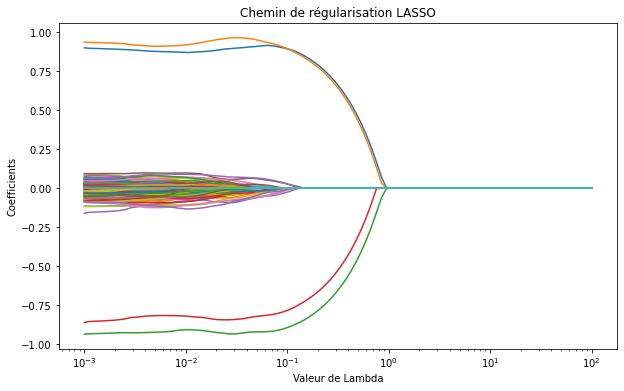

In [98]:
plt.figure(figsize=(10, 6))

for i in range(p):
    plt.plot(lambda_values,importance[i,:])

plt.xscale('log')  # Echelle logarithmique pour l'axe des lambda
plt.xlabel('Valeur de Lambda')
plt.ylabel('Coefficients')
plt.title('Chemin de régularisation LASSO')
plt.show()

In [106]:
##QUESTION 6

newx = npr.randn(1,p)  # nouvelles observations

prediction = model_lasso.predict(newx)

prediction

/home/ibotcazou/.local/lib/python3.10/site-packages/glmnet/util.py:167: RuntimeWarning: Some values of lamb are outside the range of lambda_path_ [100.0, 0.0009999999999999994]
  warnings.warn("Some values of lamb are outside the range of "


array([-0.28408252])

# EXERCICE2

In [1]:
import pandas as pd 

path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP3/leukemia_big.csv"

In [4]:
leukemia = pd.read_csv(path).transpose()
print(leukemia.shape)
leukemia.head()

(72, 7128)


,0,1,2,3,4,5,6,7,8,9,...,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127
ALL,-1.533622,-1.235673,-0.333983,0.488702,-1.300893,-1.682668,-2.010995,-1.449186,0.035344,-1.088905,...,0.385567,1.268788,-0.217954,0.255381,-1.057940,1.295992,0.733853,-0.301622,0.133657,-0.825596
ALL.1,-0.867610,-1.275501,0.375927,0.444011,-1.229660,-1.642072,0.572919,-1.588304,0.219574,0.119834,...,-0.158356,0.822880,-1.369024,0.542521,-0.796527,-0.218494,0.378380,-0.663166,-0.663166,-0.611045
ALL.2,-0.433172,-1.184492,-0.459196,0.436264,-1.325882,-1.407264,-0.264655,-1.147713,-0.573541,0.784512,...,0.662728,0.642714,-0.466828,0.856140,-0.416816,1.132893,0.475669,-0.530138,1.566946,-0.805978
ALL.3,-1.671903,-1.596424,-1.422571,0.193353,-1.818329,-1.744469,-1.793197,-1.446178,-0.325815,-1.324191,...,0.161918,0.462715,-0.585185,-0.181008,-0.611257,1.113077,0.148928,-0.625945,0.871972,-1.037246
ALL.4,-1.187689,-1.335256,-0.797493,0.235632,-1.311206,-1.654381,-1.441690,-1.058556,-0.582683,0.001758,...,0.176721,0.750758,-0.380081,0.526298,-0.888026,0.719203,0.419502,-0.487514,0.358999,-0.742858


In [5]:
target = []
for index in leukemia.index:
    if 'ALL' in index:
        target.append(1)
    else:
        target.append(0)
leukemia['target'] = np.array(target)
leukemia

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,target
ALL,-1.533622,-1.235673,-0.333983,0.488702,-1.300893,-1.682668,-2.010995,-1.449186,0.035344,-1.088905,...,1.268788,-0.217954,0.255381,-1.057940,1.295992,0.733853,-0.301622,0.133657,-0.825596,1
ALL.1,-0.867610,-1.275501,0.375927,0.444011,-1.229660,-1.642072,0.572919,-1.588304,0.219574,0.119834,...,0.822880,-1.369024,0.542521,-0.796527,-0.218494,0.378380,-0.663166,-0.663166,-0.611045,1
ALL.2,-0.433172,-1.184492,-0.459196,0.436264,-1.325882,-1.407264,-0.264655,-1.147713,-0.573541,0.784512,...,0.642714,-0.466828,0.856140,-0.416816,1.132893,0.475669,-0.530138,1.566946,-0.805978,1
ALL.3,-1.671903,-1.596424,-1.422571,0.193353,-1.818329,-1.744469,-1.793197,-1.446178,-0.325815,-1.324191,...,0.462715,-0.585185,-0.181008,-0.611257,1.113077,0.148928,-0.625945,0.871972,-1.037246,1
ALL.4,-1.187689,-1.335256,-0.797493,0.235632,-1.311206,-1.654381,-1.441690,-1.058556,-0.582683,0.001758,...,0.750758,-0.380081,0.526298,-0.888026,0.719203,0.419502,-0.487514,0.358999,-0.742858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AML.20,-0.431628,-1.335256,-0.552938,0.416816,-0.977672,-1.470619,-0.324703,-1.289505,-0.225521,1.000321,...,0.964992,-0.144663,0.612741,-0.679021,0.616776,-0.161740,-0.518640,1.771676,-0.591665,0
AML.21,-1.435259,-1.204586,-0.948874,0.408202,-1.090178,-1.485821,0.425846,-1.300074,-0.082017,0.116116,...,0.904313,-0.244317,0.650080,-0.388978,0.904313,0.254654,-0.603435,0.503216,-0.704030,0
AML.22,-0.671954,-0.751457,-0.231657,0.326556,-1.545120,-1.761632,-1.520645,-1.234919,-0.307884,-0.788105,...,0.864795,-0.195503,0.296291,-0.616989,0.861478,0.558272,-0.637751,0.079548,-0.671954,0
AML.23,-1.013161,-0.889592,-0.742163,0.361813,-1.174272,-1.579062,-0.715792,-1.251289,-0.899823,0.057872,...,1.040563,-0.636028,0.516831,-0.580809,1.183783,0.290234,-0.395623,0.311388,-0.585602,0


<AxesSubplot:>

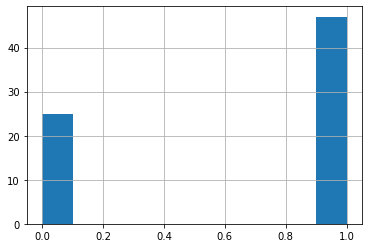

In [12]:
leukemia["target"].hist()